# PART 1

The Libraries I used!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

Create three 2D arrays (x1, x2) with shape (100, 2) where both x1 and x2 is normally distributed with following properties

- Array #1: (μx1, μx2) = (16,12), (σx1, σx2) = (2,3) 
- Array #2: (μx1, μx2) = (2,3), (σx1, σx2) = (3,2)
- Array #3: (μx1, μx2) = (5,15), (σx1, σx2) = (2,2)

1. Visualize these three arrays in one graph with different colors

In [107]:
array1 = np.random.normal((16,12), (2, 3), (100,2))
array2 = np.random.normal((2,3), (3, 2), (100,2))
array3 = np.random.normal((5,15), (2, 2), (100,2))

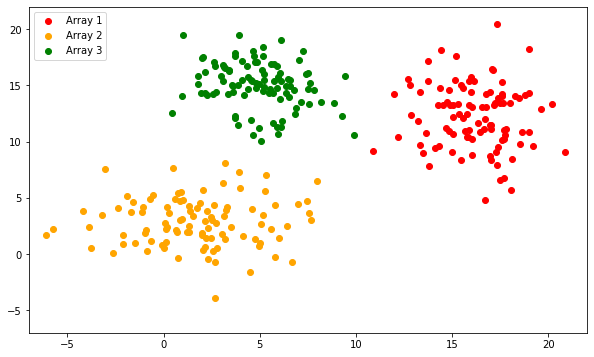

In [108]:
plt.subplots(figsize = (10,6))
plt.scatter(array1[:, 0], array1[:, 1], c='red', label='Array 1')
plt.scatter(array2[:, 0], array2[:, 1], c='orange', label='Array 2')
plt.scatter(array3[:, 0], array3[:, 1], c='green', label='Array 3')
plt.legend(loc = 'upper left')
plt.xlim(-7, 22)
plt.ylim(-7, 22)
plt.show()

2. Create a dataset containing all three of these arrays, include another column that contains labels for each of your array. Use the following labels

- Array #1: 0 
- Array #2: 1 
- Array #3: 2

Split that dataset into train and test, use 0.3 as the test size.

Visualize both the train and test datasets.

In [109]:
X = np.concatenate((array1, array2, array3))
y = np.concatenate((np.zeros(array1.shape[0])
                    ,np.ones(array2.shape[0])
                    ,np.full(array3.shape[0], 2)))

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

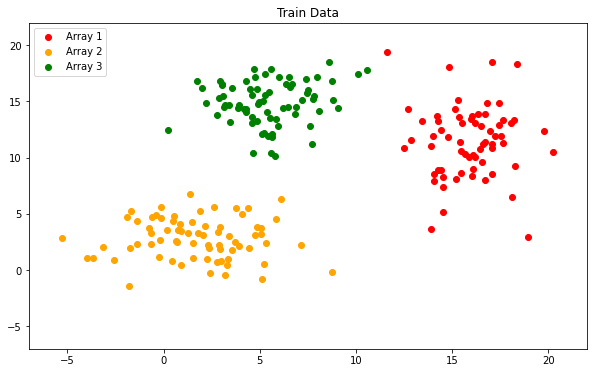

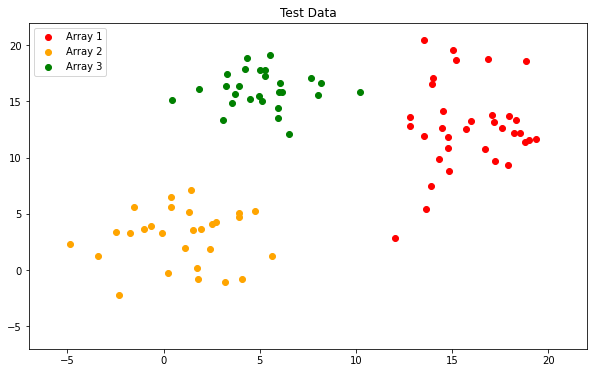

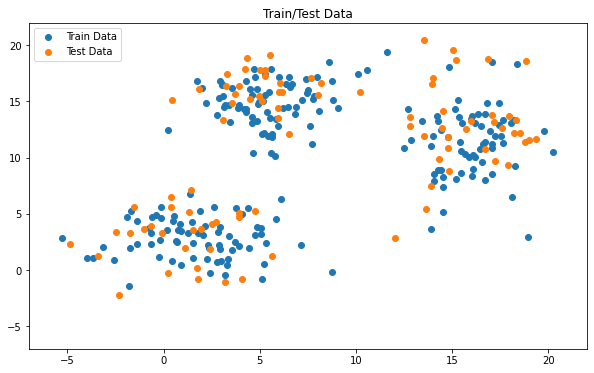

In [64]:
plt.subplots(figsize = (10,6))
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='red', label='Array 1')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='orange', label='Array 2')
plt.scatter(X_train[y_train==2, 0], X_train[y_train==2, 1], c='green', label='Array 3')
plt.legend(loc = 'upper left')
plt.xlim(-7, 22)
plt.ylim(-7, 22)
plt.title('Train Data')
plt.show()

plt.subplots(figsize = (10,6))
plt.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], c='red', label='Array 1')
plt.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], c='orange', label='Array 2')
plt.scatter(X_test[y_test==2, 0], X_test[y_test==2, 1], c='green', label='Array 3')
plt.legend(loc = 'upper left')
plt.xlim(-7, 22)
plt.ylim(-7, 22)
plt.title('Test Data')
plt.show()

fig = plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], label = 'Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], label = 'Test Data')
plt.legend(loc = 'upper left')
plt.xlim(-7, 22)
plt.ylim(-7, 22)
plt.title('Train/Test Data')
plt.show()

3. Fit a logistic regression model using the training data that you split. Report accuracy of your model on both training and test datasets.

In [65]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Train Accuracy: ",train_acc)
print("Test Accuracy: ",test_acc)

Train Accuracy:  1.0
Test Accuracy:  0.9888888888888889


4. Visualize the decision boundary of your model on top of training and test datasets. 

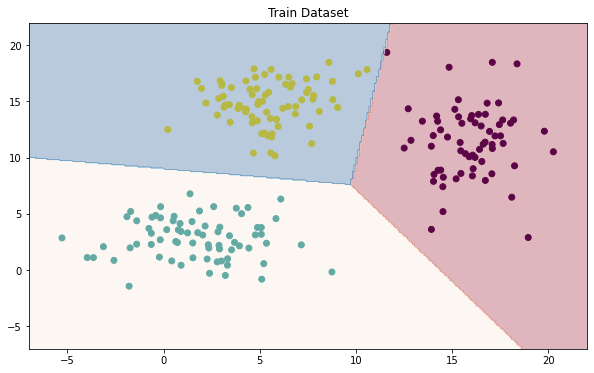

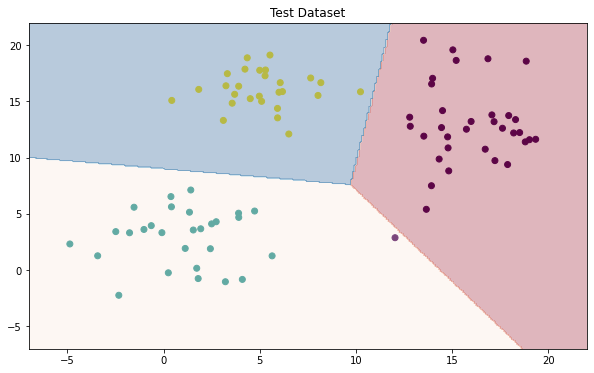

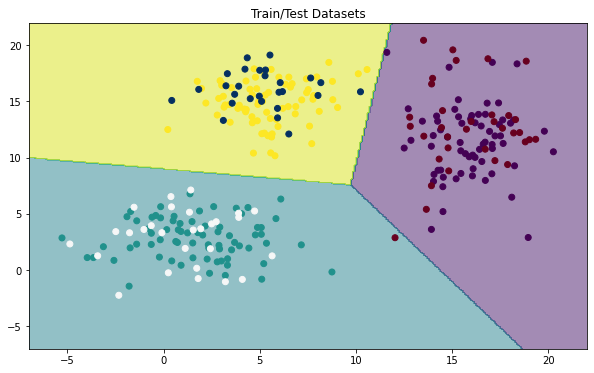

In [66]:
xx = np.linspace(-7, 22, 300)
yy = np.linspace(-7, 22, 300)

xx, yy = np.meshgrid(xx, yy)

zz = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)

#Train Dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
xlim = plt.xlim()
ylim = plt.ylim()
plt.contourf(xx, yy, zz, alpha=0.3, cmap='RdBu')
plt.xlim(-7, 22)
plt.ylim(-7, 22)
plt.title("Train Dataset")
plt.show()

#Test Dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
xlim = plt.xlim()
ylim = plt.ylim()
plt.contourf(xx, yy, zz, alpha=0.3, cmap='RdBu')
plt.xlim(-7, 22)
plt.ylim(-7, 22)
plt.title("Test Dataset")
plt.show()

#Train/Test Dataset
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, zz, alpha=0.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdBu')
plt.xlim(-7, 22)
plt.ylim(-7, 22)
plt.title("Train/Test Datasets")
plt.show()

5. Fit a decision tree classifier on your training dataset. Report accuracy of your model on both training and test datasets. Visualize the decision boundary of your model on top of training and test datasets.Why decision boundary of the decision tree is different than logistic regression's?

In [67]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Training accuracy: {train_acc:.3f}')
print(f'Test accuracy: {test_acc:.3f}')

Training accuracy: 1.000
Test accuracy: 1.000


In [91]:
xx, yy = np.meshgrid(np.linspace(-7, 22, 300),
                     np.linspace(-7, 22, 300))
zz = tree.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)

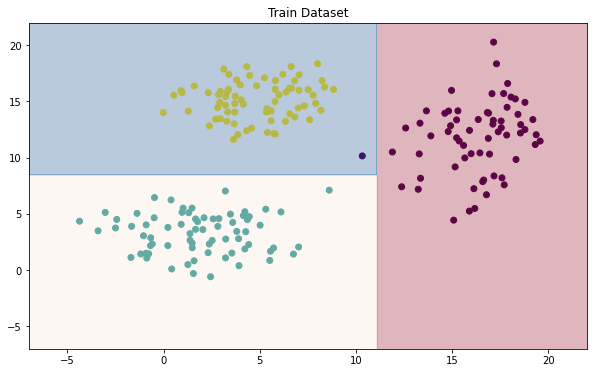

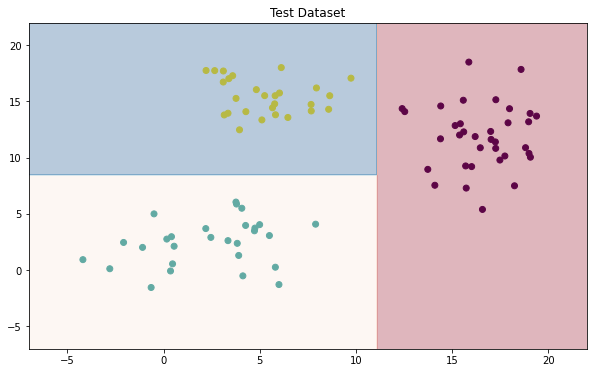

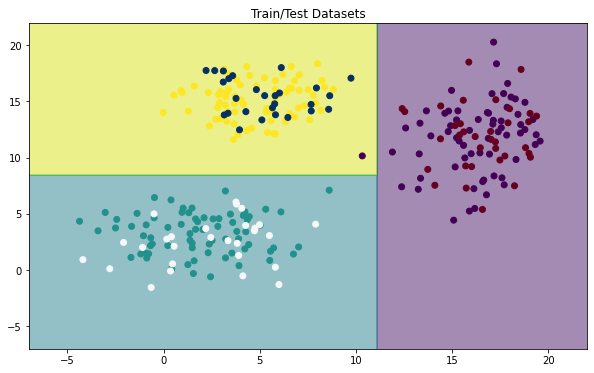

In [97]:
#Train Dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.contourf(xx, yy, zz, alpha=0.3, cmap='RdBu')
plt.xlim(-7, 22)
plt.ylim(-7, 22)
plt.title("Train Dataset")
plt.show()

#Test Dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.contourf(xx, yy, zz, alpha=0.3, cmap='RdBu')
plt.xlim(-7, 22)
plt.ylim(-7, 22)
plt.title("Test Dataset")
plt.show()

#Train/Test Datasets
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, zz, alpha=0.5)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdBu')
plt.title('Train/Test Datasets')
plt.xlim(-7, 22)
plt.ylim(-7, 22)
plt.show()

6. Overfit an SVM classifier (with RBF kernel) on your training dataset. Report accuracy of your model on both training and test datasets. Can you understand that you successfully overfitted the model by looking at your training and test accuracies?


In [119]:
xx = np.linspace(-7, 22, 300)
yy = np.linspace(-7, 22, 300)

xxx, yyy = np.meshgrid(xx, yy)
X_meshgrid = np.hstack([xxx.reshape(-1, 1), yyy.reshape(-1, 1)])

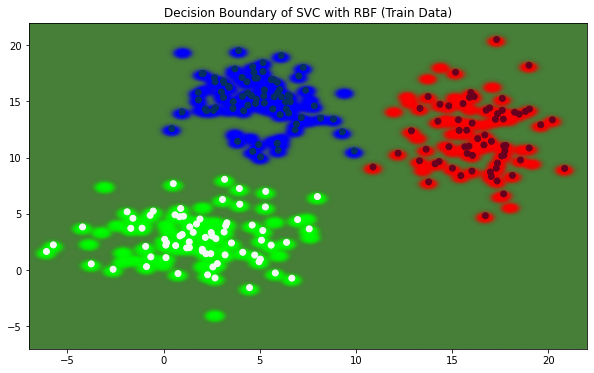

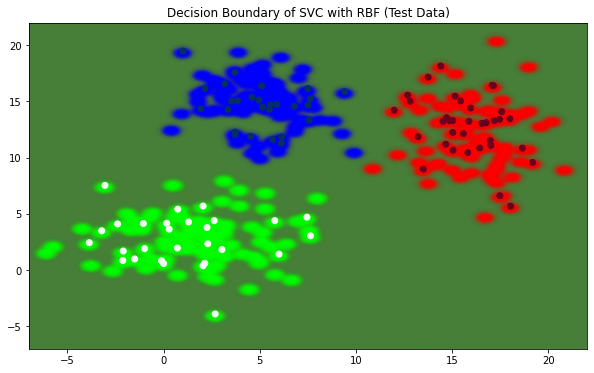

In [122]:
svc = SVC(kernel='rbf', gamma=10, probability=True)
svc.fit(X, y)
probs = svc.predict_proba(X_meshgrid)

#Train Data
fig = plt.figure(figsize=(10, 6))
plt.scatter(X_meshgrid[:, 0], X_meshgrid[:, 1], cmap="RdBu", c=probs, alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="RdBu")
plt.xlim([-7, 22])
plt.ylim([-7, 22])
plt.title("Decision Boundary of SVC with RBF (Train Data)")
plt.show()

#Test Data
fig = plt.figure(figsize=(10, 6))
plt.scatter(X_meshgrid[:, 0], X_meshgrid[:, 1], cmap="RdBu", c=probs, alpha=0.2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="RdBu")
plt.xlim([-7, 22])
plt.ylim([-7, 22])
plt.title("Decision Boundary of SVC with RBF (Test Data)")
plt.show()

In [74]:
y_train_pred = svc.predict(X_train)
y_test_pred = svc.predict(X_test)

train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f'Training accuracy: {train_acc:.3f}')
print(f'Test accuracy: {test_acc:.3f}')

Training accuracy: 1.000
Test accuracy: 1.000


# PART 2

Create three arrays:
- Array #1: (μx1, μx2) = (0,0), (σx1, σx2) = (0.5,0.5) 
- Array #2:
    - x1: evenly spaced samples between -3 and 3 with 100 elements
    - x2: x12 - 4 + normally distributed noise with (μ, σ) : (0,0.5) 
- Array #3: Array #2 - 4

Visualize these arrays.

In [2]:
array1 = np.random.normal((0,0), (0.5, 0.5), (100,2))

x1 = np.linspace(-3, 3, num=100).reshape(-1, 1)
x2 = x1*x1 - 4 + np.random.normal((0),(0.5),(100, 1))

array2 = np.concatenate((x1,x2), axis = 1)

array3 = array2 - (0,4)

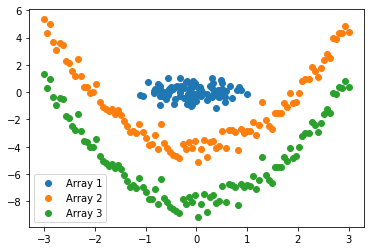

In [103]:
plt.scatter(array1[:, 0], array1[:, 1], label='Array 1')
plt.scatter(array2[:, 0], array2[:, 1], label='Array 2')
plt.scatter(array3[:, 0], array3[:, 1], label='Array 3')
plt.legend()
plt.show()


1. Create a dataset containing all three of these arrays, include another column that contains labels for each of your array. Use the following labels

- Array #1: 0 
- Array #2: 1 
- Array #3: 2

Split that dataset into train and test, use 0.3 as the test size.

Visualize both the train and test datasets

In [3]:
X = np.concatenate((array1, array2, array3))
y = np.concatenate((np.zeros(array1.shape[0])
                    ,np.ones(array2.shape[0])
                    ,np.full(array3.shape[0], 2)))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

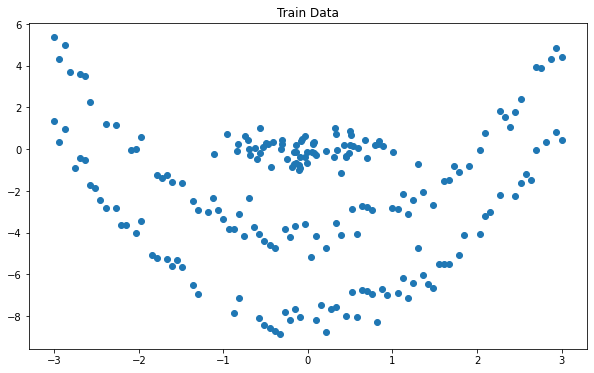

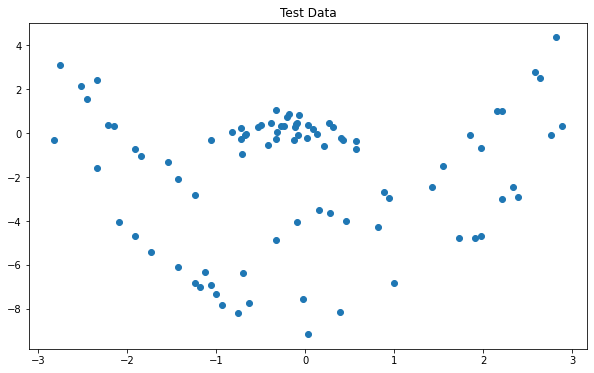

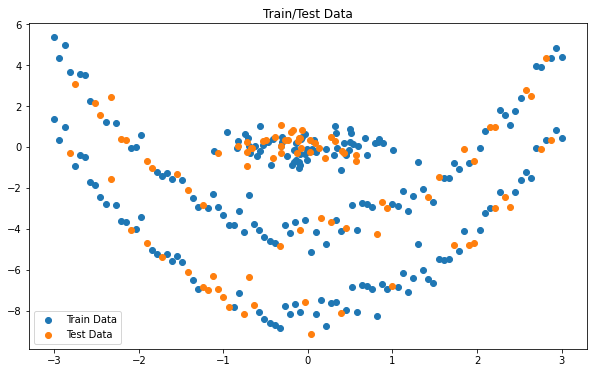

In [106]:
plt.subplots(figsize = (10,6))
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.title('Train Data')
plt.show()

plt.subplots(figsize = (10,6))
plt.scatter(X_test[:, 0], X_test[:, 1])
plt.title('Test Data')
plt.show()

fig = plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1])
plt.scatter(X_test[:, 0], X_test[:, 1])
plt.legend(["Train Data","Test Data"])
loc = "best"
plt.title('Train/Test Data')
plt.show()

2. Fit a logistic regression model using the training data that you split.

- Report accuracy of your model on both training and test datasets. Did you manage to
achieve high accuracy? Why yes/no?

- Visualize the decision boundary of your model on top of training and test datasets. Add
them to the report.

In [6]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Train Accuracy: ",train_acc)
print("Test Accuracy: ",test_acc)

Train Accuracy:  0.5380952380952381
Test Accuracy:  0.5222222222222223


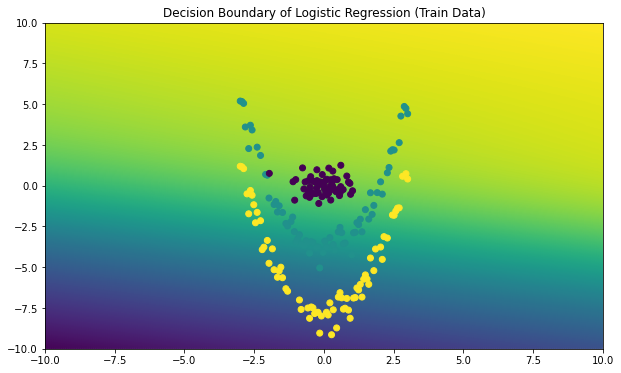

In [7]:
xx = np.linspace(-10, 10, 300)
yy = np.linspace(-10, 10, 300)

xxx, yyy = np.meshgrid(xx, yy)
X_meshgrid = np.hstack([xxx.reshape(-1, 1), yyy.reshape(-1, 1)])
probs = log_reg._predict_proba_lr(X_meshgrid)[:, 1]

fig = plt.figure(figsize=(10, 6))
plt.scatter(X_meshgrid[:, 0], X_meshgrid[:, 1], cmap="viridis", c=probs, alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis")
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.title("Decision Boundary of Logistic Regression (Train Data)")
plt.show()

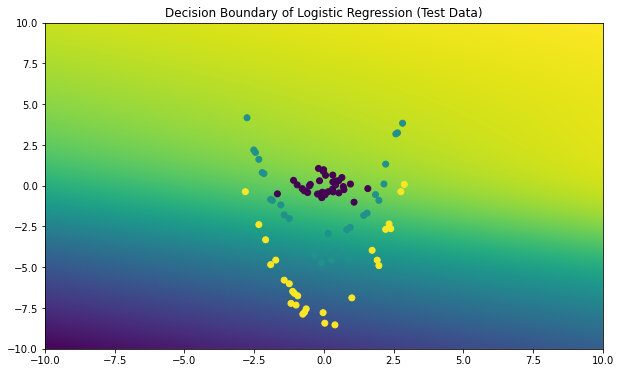

In [82]:
xx = np.linspace(-10, 10, 300)
yy = np.linspace(-10, 10, 300)

xxx, yyy = np.meshgrid(xx, yy)
X_meshgrid = np.hstack([xxx.reshape(-1, 1), yyy.reshape(-1, 1)])
probs = log_reg._predict_proba_lr(X_meshgrid)[:, 1]

fig = plt.figure(figsize=(10, 6))
plt.scatter(X_meshgrid[:, 0], X_meshgrid[:, 1], cmap="viridis", c=probs, alpha=0.2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="viridis")
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.title("Decision Boundary of Logistic Regression (Test Data)")
plt.show()

3. Fit any model that you desire to achieve high accuracy performance.
- Report accuracy of your model on both training and test datasets. Did you manage to
achieve high accuracy? Why yes/no?
- Visualize the decision boundary of your model on top of training and test datasets. Add
them to the report.

In [83]:
tree_clf = DecisionTreeClassifier(max_depth=3)
tree_clf.fit(X, y)

y_pred_train = tree_clf.predict(X_train)
y_pred_test = tree_clf.predict(X_test)

train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Train Accuracy: ",train_acc)
print("Test Accuracy: ",test_acc)

Train Accuracy:  0.8523809523809524
Test Accuracy:  0.8222222222222222


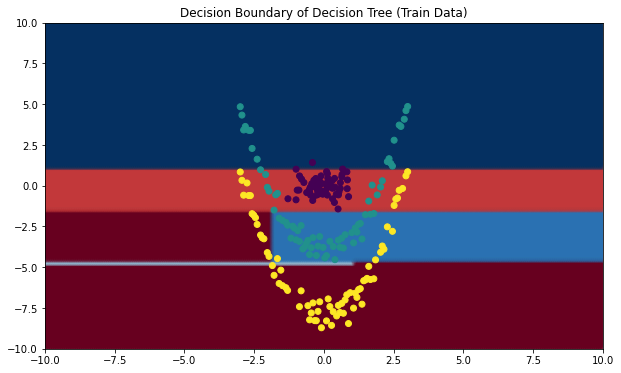

In [84]:
probs = tree_clf.predict_proba(X_meshgrid)[:, 1]

fig = plt.figure(figsize=(10, 6))
plt.scatter(X_meshgrid[:, 0], X_meshgrid[:, 1], cmap="RdBu", c=probs, alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis")
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.title("Decision Boundary of Decision Tree (Train Data)")
plt.show()

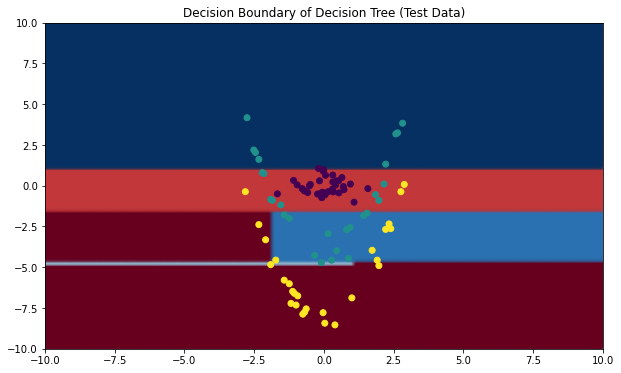

In [85]:
probs = tree_clf.predict_proba(X_meshgrid)[:, 1]

fig = plt.figure(figsize=(10, 6))
plt.scatter(X_meshgrid[:, 0], X_meshgrid[:, 1], cmap="RdBu", c=probs, alpha=0.2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="viridis")
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.title("Decision Boundary of Decision Tree (Test Data)")
plt.show()

4. Overfit any model that you desire to the training dataset.
- Explain how do you know that you overfitted.
- Report accuracy of your model on both training and test datasets. Did you get high
accuracy? Why yes/no?
- Visualize the decision boundary of your model on top of training and test datasets. Add
them to the report.

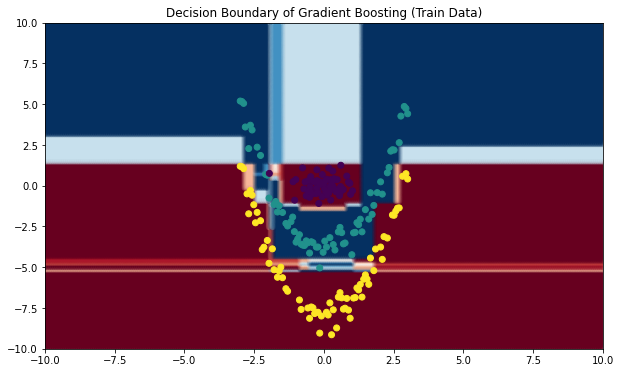

In [12]:
gbc = GradientBoostingClassifier(learning_rate = 0.001, max_depth = 10, n_estimators = 200)
gbc.fit(X, y)
probs = gbc.predict_proba(X_meshgrid)[:, 1]

fig = plt.figure(figsize=(10, 6))
plt.scatter(X_meshgrid[:, 0], X_meshgrid[:, 1], cmap="RdBu", c=probs, alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis")
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.title("Decision Boundary of Gradient Boosting (Train Data)")
plt.show()

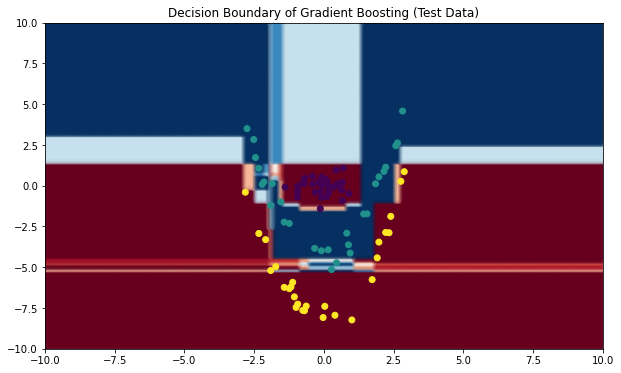

In [11]:
gbc = GradientBoostingClassifier(learning_rate = 0.001, max_depth = 10, n_estimators = 200)
gbc.fit(X, y)
probs = gbc.predict_proba(X_meshgrid)[:, 1]

fig = plt.figure(figsize=(10, 6))
plt.scatter(X_meshgrid[:, 0], X_meshgrid[:, 1], cmap="RdBu", c=probs, alpha=0.2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap="viridis")
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.title("Decision Boundary of Gradient Boosting (Test Data)")
plt.show()

In [137]:
y_pred_train = gbc.predict(X_train)
y_pred_test = gbc.predict(X_test)

train_acc = accuracy_score(y_train,y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Train Accuracy: ",train_acc)
print("Test Accuracy: ",test_acc)

Train Accuracy:  1.0
Test Accuracy:  1.0
